# Import Dataset 

- for the grader: Never submitted a notebook beofre. I got the happiness.csv from my drive which was a long path name, so if you download it locally, just uncomment the first or second cell and throw the csv in the folder if it's not there already. Apologies if I submitted it wrong. Please let me know and I can resubmit with the dataset importing correctly.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#df = pd.read_csv("HappinessData-1.csv", sep=',')
#df = pd.read_csv("/HappinessData-1.csv", sep=',')
df = pd.read_csv("/content/drive/MyDrive/483_Project1/HappinessData-1.csv", sep=',')
df



,Unhappy/Happy,City Services Availability,Housing Cost,Quality of schools,Community trust in local police,Community Maintenance,Availability of Community Room
0,1,5,3,3.0,3.0,5,3
1,0,5,3,3.0,3.0,5,3
2,0,4,3,3.0,3.0,4,4
3,0,4,1,3.0,4.0,4,5
4,1,3,2,4.0,4.0,4,5
...,...,...,...,...,...,...,...
135,1,4,3,3.0,3.0,3,4
136,0,3,4,3.0,3.0,2,3
137,1,3,3,3.0,5.0,5,5
138,1,3,3,1.0,3.0,3,4


In [ ]:
# option to delete all the rows with NaN values
#df.dropna()

# Check for null vallues in dataset

**Sources for this section:**

*isnull():* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html

*sum():* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html

*info():* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html

*loc:* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

We can see there are two in feature 3 (Community trust in local police) and 2 in feature 2 (Quality of schools)

In [ ]:
print(df.isnull().sum(), '\n')
df.info()

Unhappy/Happy                      0
City Services Availability         0
Housing Cost                       0
Quality of schools                 2
Community trust in local police    2
Community Maintenance              0
Availability of Community Room     0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unhappy/Happy                    140 non-null    int64  
 1   City Services Availability       140 non-null    int64  
 2   Housing Cost                     140 non-null    int64  
 3   Quality of schools               138 non-null    float64
 4   Community trust in local police  138 non-null    float64
 5   Community Maintenance            140 non-null    int64  
 6   Availability of Community Room   140 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 7.8 KB


In [ ]:
#Check all locations from csv are NaN before filling them
print(df.loc[5], '\n')
print(df.loc[18], '\n')
print(df.loc[27], '\n')
print(df.loc[31], '\n')

Unhappy/Happy                      1.0
City Services Availability         3.0
Housing Cost                       2.0
Quality of schools                 4.0
Community trust in local police    NaN
Community Maintenance              4.0
Availability of Community Room     5.0
Name: 5, dtype: float64 

Unhappy/Happy                      1.0
City Services Availability         5.0
Housing Cost                       3.0
Quality of schools                 4.0
Community trust in local police    NaN
Community Maintenance              4.0
Availability of Community Room     5.0
Name: 18, dtype: float64 

Unhappy/Happy                      1.0
City Services Availability         4.0
Housing Cost                       3.0
Quality of schools                 NaN
Community trust in local police    4.0
Community Maintenance              3.0
Availability of Community Room     4.0
Name: 27, dtype: float64 

Unhappy/Happy                      1.0
City Services Availability         5.0
Housing Cost           

# Handle NaN Values

**Sources for this section:**

*fillna():* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

*median():* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html

*info():* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html

*loc:* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [ ]:
# update all null locations in the column with median of entire column

print('The Median of Quality of schools is', df['Quality of schools'].median())
print('The Median of Community trust in local police is', df['Community trust in local police'].median(), '\n')

df['Quality of schools'].fillna(df['Quality of schools'].median(), inplace=True)
df['Community trust in local police'].fillna(df['Community trust in local police'].median(), inplace=True)

# Check a previous location is filled with the medians and check there are no Non-Null values in our dataset
print(df.loc[5], '\n')
print(df.loc[18], '\n')
print(df.loc[27], '\n')
print(df.loc[31], '\n')
print('\n')
df.info()

The Median of Quality of schools is 3.0
The Median of Community trust in local police is 4.0 

Unhappy/Happy                      1.0
City Services Availability         3.0
Housing Cost                       2.0
Quality of schools                 4.0
Community trust in local police    4.0
Community Maintenance              4.0
Availability of Community Room     5.0
Name: 5, dtype: float64 

Unhappy/Happy                      1.0
City Services Availability         5.0
Housing Cost                       3.0
Quality of schools                 4.0
Community trust in local police    4.0
Community Maintenance              4.0
Availability of Community Room     5.0
Name: 18, dtype: float64 

Unhappy/Happy                      1.0
City Services Availability         4.0
Housing Cost                       3.0
Quality of schools                 3.0
Community trust in local police    4.0
Community Maintenance              3.0
Availability of Community Room     4.0
Name: 27, dtype: float64 

Unhapp

# Rearange Columns

- Make Unhappy/Happy be at the end of the dataset

***Sources for this section:***

*reindex():* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html

In [ ]:
# Rearange the dataframe so that the labels Unhappy/Happy are the last column in the dataset
col_names = ['City Services Availability', 'Housing Cost' ,'Quality of schools', 'Community trust in local police', 'Community Maintenance','Availability of Community Room ', 'Unhappy/Happy']
df = df.reindex(columns=col_names)
df.head()

,City Services Availability,Housing Cost,Quality of schools,Community trust in local police,Community Maintenance,Availability of Community Room,Unhappy/Happy
0,5,3,3.0,3.0,5,3,1
1,5,3,3.0,3.0,5,3,0
2,4,3,3.0,3.0,4,4,0
3,4,1,3.0,4.0,4,5,0
4,3,2,4.0,4.0,4,5,1


# Create arrays for X (features) and Y (labels) from the dataset

**Sources for this section:**

*values.tolist():*

https://pandas.pydata.org/docs/reference/api/pandas.Series.tolist.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html

*np.ravel():* https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

*np.array():* https://numpy.org/doc/stable/reference/generated/numpy.array.html

Create an array of all the CSUF responses from the dataset for the X paramter for train_test_split(). 
- Each position of the list is an array of the respective rows from the dataset. 

In [ ]:
features_list = df[['City Services Availability', 'Housing Cost' ,'Quality of schools', 'Community trust in local police', 'Community Maintenance','Availability of Community Room ']].values.tolist()
features = np.array(features_list)
print(features)

[[5. 3. 3. 3. 5. 3.]
 [5. 3. 3. 3. 5. 3.]
 [4. 3. 3. 3. 4. 4.]
 [4. 1. 3. 4. 4. 5.]
 [3. 2. 4. 4. 4. 5.]
 [3. 2. 4. 4. 4. 5.]
 [4. 1. 3. 1. 1. 4.]
 [4. 2. 3. 3. 4. 4.]
 [5. 3. 4. 3. 4. 5.]
 [5. 3. 4. 3. 4. 5.]
 [5. 2. 3. 3. 2. 5.]
 [4. 4. 3. 4. 2. 4.]
 [4. 1. 3. 4. 4. 3.]
 [5. 2. 3. 3. 3. 3.]
 [4. 2. 4. 3. 2. 4.]
 [5. 2. 3. 3. 4. 5.]
 [4. 3. 3. 4. 2. 4.]
 [3. 1. 2. 4. 3. 5.]
 [5. 3. 4. 4. 4. 5.]
 [5. 3. 3. 4. 4. 5.]
 [1. 1. 1. 3. 1. 4.]
 [5. 2. 5. 5. 5. 3.]
 [5. 1. 3. 3. 4. 4.]
 [5. 1. 3. 3. 4. 4.]
 [5. 1. 3. 3. 4. 4.]
 [5. 2. 4. 3. 4. 5.]
 [5. 2. 4. 3. 4. 5.]
 [4. 3. 3. 4. 3. 4.]
 [4. 3. 2. 4. 3. 4.]
 [5. 1. 1. 5. 3. 5.]
 [4. 4. 4. 4. 3. 4.]
 [5. 3. 3. 5. 4. 5.]
 [5. 2. 4. 2. 2. 4.]
 [4. 4. 3. 3. 2. 5.]
 [4. 3. 3. 3. 3. 5.]
 [5. 2. 4. 4. 5. 5.]
 [5. 2. 4. 4. 5. 5.]
 [5. 5. 5. 2. 5. 5.]
 [4. 1. 3. 4. 4. 4.]
 [4. 1. 3. 4. 4. 4.]
 [3. 3. 3. 5. 4. 3.]
 [4. 1. 1. 3. 4. 4.]
 [5. 1. 5. 5. 5. 5.]
 [5. 4. 5. 5. 5. 5.]
 [4. 2. 2. 4. 4. 5.]
 [4. 3. 3. 4. 3. 4.]
 [3. 4. 3. 4. 1. 4.]
 [4. 5. 5. 5.

Create a 1-d array to pass as the Y parameter for train_test_split() that represents the labels for 0/1 (Unhappy/Happy)

In [ ]:
labels_list = df[['Unhappy/Happy']].values.tolist()
labels = np.ravel(labels_list)
print(labels)

[1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1]


Check there is a label for every feature

In [ ]:
print(len(features))
print(len(labels))

140
140


# Train Model using sikit-learn's KNN Classifier

**Sources used for this section:**

*plt.plot:* https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html

*KNeighborsClassifier:* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

*accuracy_score:* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

*train_test_split:* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

Imports from scikit-learn to train our model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Test one possible prediction
- output should be a 1 (Happy) or 0 (Unhappy)
- change the single_attempt_model.predict([[5,1,3,1,5,3]]) to different inputs to see what it will predict. 
 - Examples to use are: 
  [[5,1,3,1,5,3]], 
  [[1,1,3,1,5,3]],
  [[5,3,3,3,5,3]],
  [[3,2,4,4,4,5]]

In [ ]:
single_attempt_model = KNeighborsClassifier(n_neighbors=5)
single_attempt_model.fit(features,labels)
# Test prediction for a single CSUF resident 
happy_unhappy_prediction = single_attempt_model.predict([[1,1,3,1,5,3]])
print(happy_unhappy_prediction)

[0]


Trains a model with sklearn's KNeighborsClassifier() and prints the accuracy of it's prediction

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)
k_neighbor = KNeighborsClassifier(n_neighbors=5)
k_neighbor.fit(X_train, y_train)
y_prediction = k_neighbor.predict(X_test)

print('Accuracy Score', accuracy_score(y_test, y_prediction))

Accuracy Score 0.6808510638297872


Runs the model in a for loop that tests a different K-Value every iteration. Each iteration stores the error rate of that k-value, along with the k-value itself. Then we plot the data to see which k value demonstrates the lowest error rate from our model.

After running the cell, we can see that k = 7 has the lowest error rate, which will produce our highest accuracy. 

Text(0, 0.5, 'Error Rate')

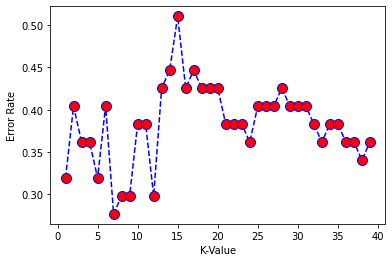

In [ ]:
error_list = []
kvalue_list = []
for i in range(1,40):
    k_neighbor = KNeighborsClassifier(n_neighbors=i)
    k_neighbor.fit(X_train, y_train)
    y_prediction = k_neighbor.predict(X_test)
    error_rate = 1- accuracy_score(y_test, y_prediction)
    error_list.append(error_rate)
    kvalue_list.append(i)
plt.plot(kvalue_list, error_list, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel("K-Value")
plt.ylabel("Error Rate")

Now if we train the model again using k=7, you'll see a higher accuracy score.

In [ ]:
k_neighbor = KNeighborsClassifier(n_neighbors=7)
k_neighbor.fit(X_train, y_train)
y_prediction = k_neighbor.predict(X_test)

print('Accuracy Score', accuracy_score(y_test, y_prediction))

Accuracy Score 0.723404255319149


# KNN built form scratch

- without using sklearns KNeighborsClassifier(), fit(), and predict()

In [ ]:

import math

# Get distance of one point to another from test 
# and train data using eucladian metric
def calculate_distance(point1, point2):
    distance_calculation = math.sqrt(sum((point2-point1)**2))
    return distance_calculation

# Given a list of labels ex: [1 0 0 0 0 1 1]
# returns the most frequent label being 1 or 0

def calculate_prediction(labels):
    count1=0
    count2=0
    for i in range(len(labels)):
        if labels[i] == 0:
          count1+=1
        else:
          count2+=1
    if count1 > count2:
      result = 0
    else: 
      result = 1 
    
    return result

# Given a list of distances and the neighbor k,
# returns a list of size = k with the index of the shortest distances
# representing the position of y_train dataset responses
# Example: 
#  y_train = [0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0
#             0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1
#             1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1]
#  sorted_distance() = [8, 1, 18, 23, 38, 2, 4]
#  8 in sorted distances is the position of y_train[8] reponse which equals 0

def sort_distances(distance_list, k):
    sorted_list = []
    for i in range(len(distance_list)):
          sorted_list.append([distance_list[i],i])
    sorted_list.sort()
    sorted_distance_index = []
   
    for i in sorted_list:
      sorted_distance_index .append(i[1])
    
    return sorted_distance_index [:k]


def knn_classifier_scratch(X_train, X_test, y_train, k):
    # list to hold resulting label responses of 1's and 0's
    labels_list = []
    # loops through every data point in the X test array
    # Example data point: array[4. 2. 2. 4. 4. 5.]
    # length of train dataset = 47
    for datapoint_X in X_test:
        # list to hold all the calculated distances unsorted
        distance_list = []

        # loops through every data point in the X train array
        # Example data point: [4. 1. 3. 4. 4. 3.]
        # length of test dataset = 93
        for datapoint_Y in range(len(X_train)):
          # calculate eucladian distance from each point in the train and test data
            distance_calc = calculate_distance(X_train[datapoint_Y,:], datapoint_X)
            distance_list.append(distance_calc)
     
        # Sorts distance and returns the index 
        # first occurance of the sort up to k times
        k_nearest_neighbors = sort_distances(distance_list, k)
      
      
        # Store the label responses of the knn's
        y_train_labels = y_train[k_nearest_neighbors ]
     
        # determines the amount of 1's and 0's to predict if the final label
        # should be a 1 or a 0
        final_label = calculate_prediction(y_train_labels)

   
        labels_list.append(final_label)
    # returns the list of predicted labels
    return labels_list

Train our model with KNN from scratch algorithm
- we can see that it gives a 68 percent accuracy score, slightly less than sklearns classification method

This means for a first time attempt at understanding KNN, not so bad, but I could make a lot of improvements such as how I'm preproccessing the data. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)
# train the model using KNN algorithm built from scratch
y_prediction = knn_classifier_scratch(X_train,X_test,y_train , 7)
print('Accuracy Score', accuracy_score(y_test, y_prediction))

Accuracy Score 0.6808510638297872


Runs the model in a for loop that tests a different K-Value every iteration. Each iteration stores the error rate of that k-value, along with the k-value itself. Then we plot the data to see which k value demonstrates the lowest error rate from our model.

After running the cell, even with the KNN built from scratch, we can see that k = 7 has the lowest error rate, which will produce our highest accuracy.

Same code cell as previous training model, only I used the KNN from scratch algorithm rather than the sklearn one

Text(0, 0.5, 'Error Rate')

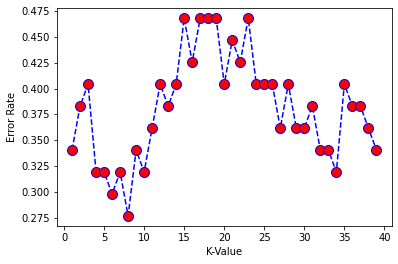

In [ ]:
error_list = []
kvalue_list = []
for i in range(1,40):
    y_prediction = knn_classifier_scratch(X_train,X_test,y_train , i)
    error_rate = 1- accuracy_score(y_test, y_prediction)
    error_list.append(error_rate)
    kvalue_list.append(i)
plt.plot(kvalue_list, error_list, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel("K-Value")
plt.ylabel("Error Rate")